<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part2/P2_Ch02_CH07_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Mini-Batches 
Logistic Regression 같은 경우는 target-weight를 따라가는게 아니고 발산한다.
decision boundary의 비율을 지키려 하기 때문임!! -b/w

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(0)
plt.style.use('seaborn') 

#set params
N, n_feature = 5000, 3
lr = 0.01
epochs = 500
b_size = 256

t_W = np.random.uniform(-1, 1, (n_feature, 1))
t_b = np.random.uniform(-1, 1, (1, 1))
W = np.random.uniform(-1, 1, (n_feature, 1))
b = np.random.uniform(-1, 1, (1, 1))

n_batch = N//b_size 

# Generate Dataset
x_data = np.random.normal(0, 1, (N, n_feature))
y_data = x_data @ t_W + t_b
y_data = (y_data > 0 ).astype(np.int)
# print(x_data.shape, y_data.shape)

# Training
J_track = list()
acc_track = list()
for epoch in range(epochs):
  for b_idx in range(n_batch):
    #Get Mini-Batches
    X = x_data[b_idx*b_size : (b_idx + 1)*b_size, ...]
    Y = y_data[b_idx*b_size : (b_idx + 1)*b_size, ...]

    #Forward Propagation
    # print(X.shape, W.shape, b.shape)
    Z = X @ W + b
    Pred = 1/(1+ np.exp(-Z))
    J0 = -(Y*np.log(Pred) + (1-Y)*np.log(1-Pred))
    J = np.mean(J0)
    J_track.append(J)

    #Calculate Accuracy
    Pred_ = (Pred > 0.5).astype(np.int)
    # print(Pred_.shape, Y.shape)
    n_correct = np.sum((Pred_ == Y).astype(np.int))
    # print(n_correct)
    acc = n_correct / b_size
    acc_track.append(acc)

    #jacobians
    dJ_dJ0 = 1/N*np.ones((1,b_size))
    dJ0_dPred = np.diag(((Pred-Y)/(Pred*(1-Pred))).flatten())
    dPred_dZ = np.diag((Pred*(1-Pred)).flatten())
    dZ_dW  = X
    dZ_db = np.ones((b_size, 1))

    # print(Pred.shape, Y.shape)

    # print(dJ_dJ0.shape)
    # print(dJ0_dPred.shape)
    # print(dPred_dZ.shape)
    # print(dZ_dW.shape)
    # print(dZ_db.shape)

    #Backpropagation
    dJ_dPred = dJ_dJ0 @ dJ0_dPred
    dJ_dZ = dJ_dPred @ dPred_dZ
    dJ_dW = dJ_dZ @ dZ_dW
    dJ_db = dJ_dZ @ dZ_db

    # print(dJ_dW.shape, W.shape)
    # print(dJ_db.shape, b.shape)

    #Parameter Update

    W = W -lr*dJ_dW.T
    b = b-lr*dJ_db






<ipython-input-19-635175a3c384>:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_data = (y_data > 0 ).astype(np.int)
<ipython-input-19-635175a3c384>:44: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; 

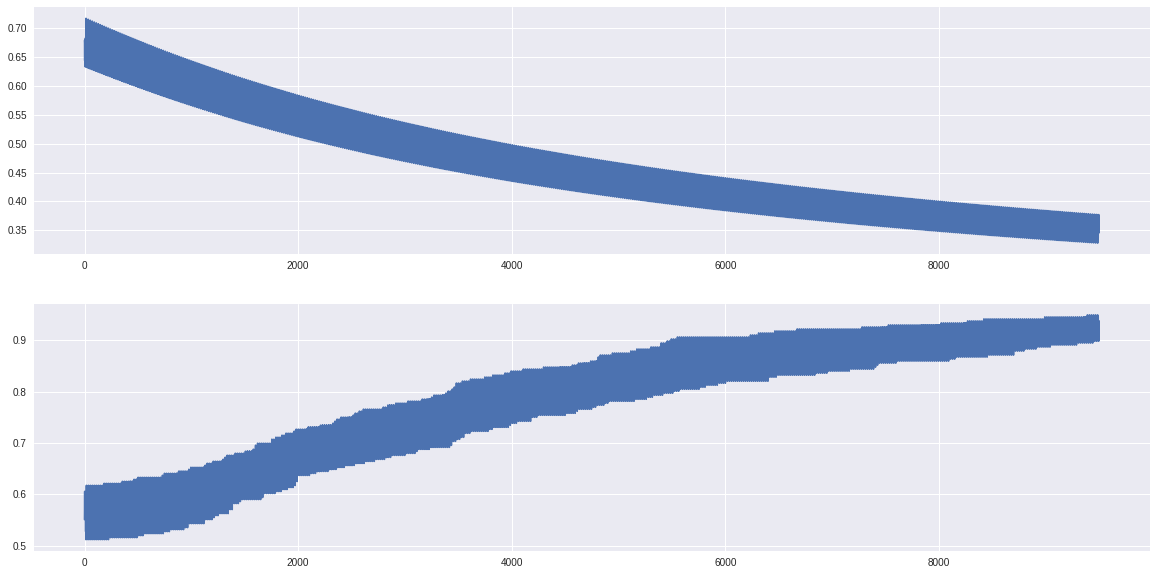

In [20]:
# Visualization

fig, axes = plt.subplots(2,1,figsize = (20, 10))
axes[0].plot(J_track)
axes[1].plot(acc_track)